In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys
sns.set(color_codes=True)

%matplotlib inline

In [230]:
# load training data text
train_file = pd.read_csv('train_data.csv',delimiter=',', header=0,
                        dtype={'name':str, 'lvl1':str, 'lvl2':str, 'lvl3':str, 'descrption':str, 'type':str})
train_file.columns = ['id', 'name','lvl1','lvl2','lvl3','descrption','price','type']
train_file.duplicated(subset=None, keep='first')
train_file.set_index('id', inplace = True)
train_file.head()
#print(len(train_file))

,name,lvl1,lvl2,lvl3,descrption,price,type
id,,,,,,,
1,Cuba Heartbreaker Eau De Parfum Spray 100ml/3.3oz,Health & Beauty,Bath & Body,Hand & Foot Care,Formulated with oil-free hydrating botanicals/...,128.00,international
2,32GB USB 3.0 Swivel Flash Drive Memory Stick S...,Computers & Laptops,Storage,Flash Drives,<ul> <li>Interface: USB 3.0</li> <li>Capacity:...,14.69,international
3,Eican ALP8L-01 Metal + PC Phone Cover Luxury A...,Mobiles & Tablets,Accessories,Phone Cases,<ul> <li>Aluminum Frame</li> <li>Built-in Stan...,14.10,international
4,IPAKY Hybrid Luxury Silicone Case Cover And Pl...,Mobiles & Tablets,Accessories,Phone Cases,<ul> <li>Ultal thin Slim Style + Full Protecti...,17.94,international
5,Phone case for iPhone 5/5s/SE You Can Be Sore ...,Mobiles & Tablets,Accessories,Phone Cases,<ul> <li>High Quality phone Case for iPhone 5/...,6.80,international


In [232]:
#clean up data for lvl1&2&3
train_file['lvl1'] = train_file['lvl1'].str.lower().replace('[^a-zA-Z]+',' ',regex=True)
#train_file['lvl1'] = train_file['lvl1'].str.strip()
train_file['lvl2'] = train_file['lvl2'].str.lower().replace('[^\'\w]+',' ',regex=True)
train_file['lvl3'] = train_file['lvl3'].str.lower().replace('[^\'\w]+',' ',regex=True)

mapping_lvl1 = map_mathod('lvl1')
mapping_lvl2 = map_mathod('lvl2')
mapping_lvl3 = map_mathod('lvl3')


train_file['lvl1'] = train_file['lvl1'].map(mapping_lvl1)

#def like_function(x):
#    group = "unknown"
#    for key in mapping_lvl2:
#        if key in x:
#            group = mapping_lvl2[key]
#            break
#    return group

#train_file['lvl2'] = train_file.lvl2.apply(like_function)
train_file['lvl2'] = train_file['lvl2'].map(mapping_lvl2)
train_file['lvl3'] = train_file['lvl3'].map(mapping_lvl3)

train_file.head(10)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


,name,lvl1,lvl2,lvl3,descrption,price,type
id,,,,,,,
1,Cuba Heartbreaker Eau De Parfum Spray 100ml/3.3oz,1.0,1.0,1.0,Formulated with oil-free hydrating botanicals/...,128.00,international
2,32GB USB 3.0 Swivel Flash Drive Memory Stick S...,2.0,2.0,2.0,<ul> <li>Interface: USB 3.0</li> <li>Capacity:...,14.69,international
3,Eican ALP8L-01 Metal + PC Phone Cover Luxury A...,3.0,3.0,3.0,<ul> <li>Aluminum Frame</li> <li>Built-in Stan...,14.10,international
4,IPAKY Hybrid Luxury Silicone Case Cover And Pl...,3.0,3.0,3.0,<ul> <li>Ultal thin Slim Style + Full Protecti...,17.94,international
5,Phone case for iPhone 5/5s/SE You Can Be Sore ...,3.0,3.0,3.0,<ul> <li>High Quality phone Case for iPhone 5/...,6.80,international
6,NG-40C Ring-Shaped 40W 3166lm 5400K Macro Phot...,4.0,4.0,4.0,<ul> <li>1. Color Temperature: 5400K</li> <li>...,388.99,international
7,Asus TP300LJ-DW004H Transformer Book Flip 4GB ...,2.0,5.0,5.0,"<div class=""prod_content""> <div class=""prod_de...",2599.00,local
8,High Quality Genuine Leather Belts For Men Rev...,5.0,6.0,6.0,"<ul> <li>Rotated buckle,A belt can have two co...",21.74,international
9,McDonald's Coke Can Glass Limited Edition 12oz...,6.0,7.0,7.0,<ul> <li>Genuine issued McDonald's Coca Cola m...,25.00,local


340000.0

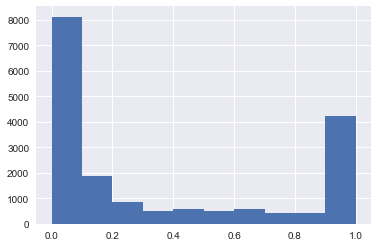

In [233]:
#normalize price
maxp = train_file.price.max()
#hist = train_file.price.hist(bins=10)
valuethred = 600.
train_file['price'] = train_file['price'].clip(lower=0.,upper=valuethred).div(valuethred,fill_value=None)
#train_file['price'] = train_file['price'].div(valuethred,fill_value=None)
hist = train_file['price'].hist(bins=10)
maxp


In [234]:
#clean up type 
#temp = train_file.type.drop_duplicates(keep='first',inplace=False)
#temp
mapping_type = {'international':1.,'local':2., np.nan:0.}
train_file['type'] = train_file['type'].map(mapping_type)
train_file.head(10)

,name,lvl1,lvl2,lvl3,descrption,price,type
id,,,,,,,
1,Cuba Heartbreaker Eau De Parfum Spray 100ml/3.3oz,1.0,1.0,1.0,Formulated with oil-free hydrating botanicals/...,0.213333,1.0
2,32GB USB 3.0 Swivel Flash Drive Memory Stick S...,2.0,2.0,2.0,<ul> <li>Interface: USB 3.0</li> <li>Capacity:...,0.024483,1.0
3,Eican ALP8L-01 Metal + PC Phone Cover Luxury A...,3.0,3.0,3.0,<ul> <li>Aluminum Frame</li> <li>Built-in Stan...,0.023500,1.0
4,IPAKY Hybrid Luxury Silicone Case Cover And Pl...,3.0,3.0,3.0,<ul> <li>Ultal thin Slim Style + Full Protecti...,0.029900,1.0
5,Phone case for iPhone 5/5s/SE You Can Be Sore ...,3.0,3.0,3.0,<ul> <li>High Quality phone Case for iPhone 5/...,0.011333,1.0
6,NG-40C Ring-Shaped 40W 3166lm 5400K Macro Phot...,4.0,4.0,4.0,<ul> <li>1. Color Temperature: 5400K</li> <li>...,0.648317,1.0
7,Asus TP300LJ-DW004H Transformer Book Flip 4GB ...,2.0,5.0,5.0,"<div class=""prod_content""> <div class=""prod_de...",1.000000,2.0
8,High Quality Genuine Leather Belts For Men Rev...,5.0,6.0,6.0,"<ul> <li>Rotated buckle,A belt can have two co...",0.036233,1.0
9,McDonald's Coke Can Glass Limited Edition 12oz...,6.0,7.0,7.0,<ul> <li>Genuine issued McDonald's Coca Cola m...,0.041667,2.0


In [235]:
table = pd.pivot_table(train_file,values = 'price', index=['lvl1','lvl2','lvl3'],columns=['type'],aggfunc=[min, max, np.mean])
table

min                           max                   \
type                  0.0       1.0       2.0       0.0       1.0    2.0   
lvl1 lvl2 lvl3                                                             
1.0  1.0  1.0    0.115833  0.007500  0.004500  0.115833  1.000000  1.000   
          94.0        NaN  0.048000  0.003250       NaN  1.000000  1.000   
          95.0   0.205000  0.065250  0.002083  0.471750  1.000000  1.000   
          124.0       NaN  0.016150  0.019833       NaN  0.428400  1.000   
     11.0 12.0        NaN  0.011333  0.008317       NaN  1.000000  1.000   
          30.0        NaN  0.004200  0.002217       NaN  1.000000  1.000   
          51.0   0.708333  0.007333  0.028200  0.708333  1.000000  1.000   
          112.0       NaN  0.005167  0.003333       NaN  1.000000  1.000   
          114.0       NaN  0.010617  0.008167       NaN  1.000000  1.000   
          132.0       NaN  0.009017  0.053333       NaN  1.000000  1.000   
     15.0 16.0   0.408750  0.006100  0.015000  0.408750  1.000000  1.000   
     16.0 17.0        NaN  0.114367  0.031667       NaN  0.938217  1.000   
          143.0  0.020000  0.125550  0.025000  0.058167  0.830250  1.000   
          156.0  0.665000  0.046317  0.044167  1.000000  1.000000  1.000   
          183.0       NaN  0.106333  0.028333       NaN  1.000000  1.000   
     17.0 0.0    0.125000  0.014083  0.005000  0.415000  1.000000  1.000   
          18.0   0.010000  0.055833  0.012167  1.000000  1.000000  1.000   
          67.0   0.331667  0.021833  0.020000  0.521667  1.000000  1.000   
          161.0  0.051667  0.045000  0.037333  0.051667  0.720117  1.000   
     24.0 37.0        NaN  0.004600  0.013333       NaN  1.000000  1.000   
          73.0        NaN  0.012000  0.033167       NaN  1.000000  1.000   
          79.0        NaN  0.007500  0.025300       NaN  1.000000  1.000   
          88.0   0.145000  0.008667  0.051667  0.145000  1.000000  1.000   
     25.0 40.0   0.056500  0.028000  0.010533  1.000000  1.000000  1.000   
          76.0        NaN  0.022267  0.026650       NaN  1.000000  0.665   
          81.0        NaN  0.028050  0.021500       NaN  1.000000  1.000   
          118.0  0.070000  0.006183  0.028167  0.070000  1.000000  1.000   
     39.0 66.0   1.000000  0.229667  0.010833  1.000000  1.000000  1.000   
          97.0        NaN       NaN  0.075000       NaN       NaN  1.000   
          145.0       NaN  0.045000  0.025500       NaN  0.464583  1.000   
...                   ...       ...       ...       ...       ...    ...   
8.0  23.0 33.0        NaN  0.016483  0.063333       NaN  1.000000  1.000   
          44.0   0.998333  0.015333  0.080000  0.998333  1.000000  1.000   
          52.0   0.066667  0.107333  0.026917  0.066667  0.289850  1.000   
          93.0        NaN  0.005667  0.011667       NaN  1.000000  1.000   
          110.0       NaN  0.013867  0.096667       NaN  0.958150  1.000   
          122.0       NaN  0.007917  0.041667       NaN  1.000000  1.000   
          134.0  1.000000  0.015717  0.074833  1.000000  1.000000  1.000   
          137.0       NaN  0.025167  0.033000       NaN  1.000000  1.000   
          173.0       NaN  0.005167  0.021500       NaN  1.000000  1.000   
          182.0       NaN  0.015433  0.023317       NaN  1.000000  1.000   
     45.0 91.0        NaN  0.028000  0.046667       NaN  1.000000  1.000   
9.0  26.0 41.0   1.000000  0.018067  0.059333  1.000000  1.000000  1.000   
          138.0       NaN  0.008333  0.016500       NaN  1.000000  1.000   
          152.0       NaN  0.016017  0.026500       NaN  1.000000  1.000   
          158.0       NaN  0.018333  0.011500       NaN  1.000000  0.915   
     27.0 42.0        NaN  0.031500  0.541667       NaN  1.000000  1.000   
          117.0       NaN  0.068983  0.083167       NaN  1.000000  1.000   
     31.0 45.0   1.000000  1.000000  0.291650  1.000000  1.000000  1.000   
          174.0       NaN  1.000000  0.066667       NaN  1.000000  1.0